<a href="https://colab.research.google.com/github/khushurs98/Machine-Learning-/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import os
import pandas as pd
import numpy as np

In [20]:
df=pd.read_csv('/content/Salary_Data.csv')

In [21]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
x=df[['YearsExperience']].values
y=df['Salary'].values
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [30]:
#alternatemethod for above code
'''
x=df.iloc[:,0].values
y=df.iloc[:,1].values
print(x)
print(y)'''

'\nx=df.iloc[:,0].values\ny=df.iloc[:,1].values  \nprint(x)\nprint(y)'

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [33]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [34]:
from sklearn import metrics

In [39]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 2446.1723690465055
MSE: 12823412.298126549
RMSE: 3580.979237321343


In [40]:
#r2=accuracy as it subtracts the error from 1
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.988169515729126

In [41]:
import matplotlib.pyplot as plt

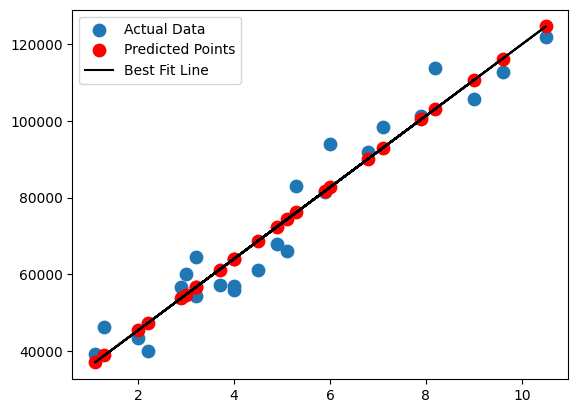

In [46]:
plt.scatter(x_train,y_train,label='Actual Data',s=80)
plt.scatter(x_train,model.predict(x_train),color='red',label='Predicted Points',s=80)
plt.plot(x_train,model.predict(x_train),color='black',label='Best Fit Line')
plt.legend()
plt.show()

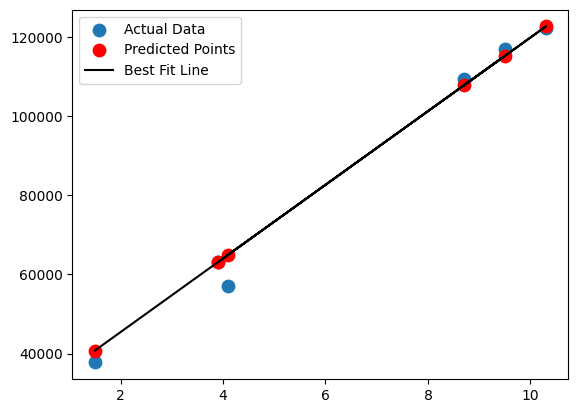

In [47]:
plt.scatter(x_test,y_test,label='Actual Data',s=80)
plt.scatter(x_test,model.predict(x_test),color='red',label='Predicted Points',s=80)
plt.plot(x_test,model.predict(x_test),color='black',label='Best Fit Line')
plt.legend()
plt.show()

In [50]:
accuracy=[]
for i in range(1,10):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
  model=LinearRegression()
  model.fit(x_train,y_train)
  ypred=model.predict(x_test)
  accuracy.append(r2_score(y_test,ypred))

In [53]:
print(np.max(accuracy))
print(np.argmax(accuracy))
accuracy


0.9695039421049821
2


[0.7616681465472094,
 0.8886956733784563,
 0.9695039421049821,
 0.9504404484884267,
 0.9439628569611376,
 0.9368146227107087,
 0.8143022783109006,
 0.9631182154839476,
 0.9388416537799072]

In [57]:
def salary():
  exp=float(input("Enter your work experience in years:"))
  sal=model.predict([[exp]])
  print("Your salary is:",sal[0])

In [56]:
salary()

Enter your work experience in years:12.53
Your salary is: [142145.9678035]


In [60]:
import joblib
joblib.dump(model,'salary.pkl');

In [62]:
Mymodel=joblib.load('salary.pkl')

In [65]:
round(Mymodel.predict([[0.5]])[0],2)

32019.29